In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
import pandas as pd

wine_data = pd.read_csv('data/winequality-red.csv')
print(wine_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [16]:
df = pd.read_csv('data/winequality-red.csv')
df.head();

X = df[["fixed acidity","volatile acidity","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
y = df["quality"]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25,
 random_state=1, stratify=y)

df['quality'].describe()




(1599, 10)
(1599,)


count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [17]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [18]:
def isTasty(quality):
    if quality >= 7:
        return 'Excellent'
    elif quality >= 5:
        return 'Medium'
    else:
        return 'Not good'

In [19]:
df['tasty'] = df['quality'].apply(isTasty)

In [20]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'tasty'],
      dtype='object')

In [21]:
df['tasty'].value_counts()

Medium       1319
Excellent     217
Not good       63
Name: tasty, dtype: int64

In [22]:
X = df[["fixed acidity","volatile acidity","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
y = df["tasty"]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
 random_state=123, stratify=y)

(1599, 10)
(1599,)


In [23]:
# Model Accuracy
for d in range(2,10) :
    tree = DecisionTreeClassifier(max_depth=d)
    tree.fit(X_train,y_train)
    y_hat = tree.predict(X_test)
    actual_depth = tree.get_depth()
    print("Depth: ", actual_depth, "Accuracy:", metrics.accuracy_score(y_test, y_hat))

Depth:  2 Accuracy: 0.7897727272727273
Depth:  3 Accuracy: 0.8257575757575758
Depth:  4 Accuracy: 0.803030303030303
Depth:  5 Accuracy: 0.7992424242424242
Depth:  6 Accuracy: 0.8276515151515151
Depth:  7 Accuracy: 0.8087121212121212
Depth:  8 Accuracy: 0.7992424242424242
Depth:  9 Accuracy: 0.7992424242424242


In [24]:
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train,y_train)
y_hat = tree.predict(X_test)
#print(y_test)
#print(y_hat)
#print(y_hat.shape)

print("Accuracy:", metrics.accuracy_score(y_test, y_hat))

Accuracy: 0.8238636363636364


In [25]:
cm = confusion_matrix(y_test, y_hat)
cm = confusion_matrix(y_test, y_hat, labels=['Excellent','Medium','Not good'])
print(cm)

[[ 25  47   0]
 [ 21 408   6]
 [  1  18   2]]


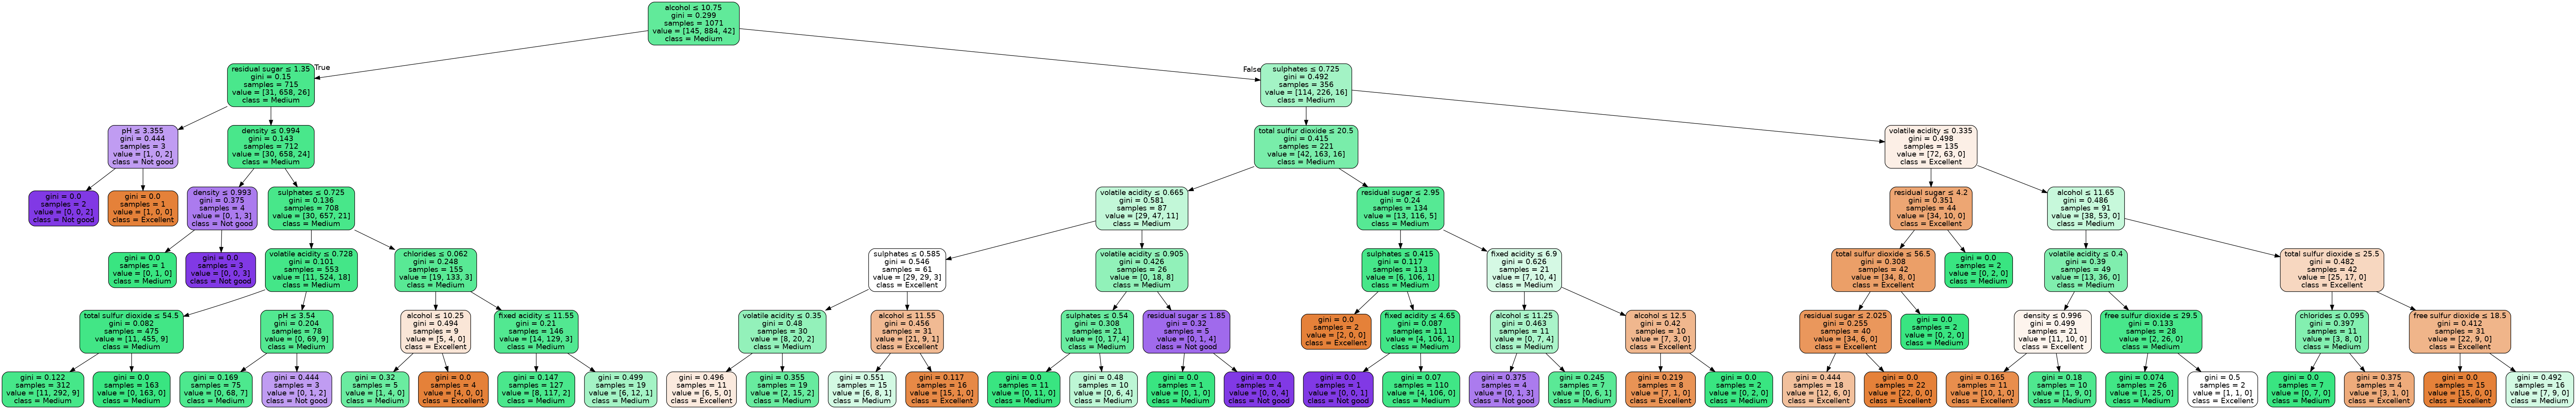

In [26]:
feature_names = ["fixed acidity","volatile acidity","residual sugar","chlorides","free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol"]
target_names = ["Excellent","Medium","Not good"]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('plots/iris.png')
Image(graph.create_png())

